<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
RS = 42

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [2]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(link, delimiter=';')

1.Оцените качество по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [3]:
clfs = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=RS),
    'Bagging Classifier': BaggingClassifier(n_estimators=100, random_state=RS),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=RS)
}

x = data.loc[:,:'alcohol']
y = data['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=RS, test_size=0.3)
results = {}
for clf_name, clf in clfs.items():
    model = clf.fit(x_train, y_train)
    results[clf_name] = model.score(x_test, y_test)
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
Random Forest Classifier,0.654167
Bagging Classifier,0.641667
Decision Tree Classifier,0.572917


Ансамбль моделей дает лучшую точность чем одно дерево решений

2.Разделите выборку на обучающую и тестовую в отношении 70%/30%

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [5]:
from sklearn.metrics import accuracy_score
estim_cnt = [10, 50, 100] + [x for x in range(200, 5001, 200)]
results = {}
for x in estim_cnt:
    model = RandomForestClassifier(n_estimators=x, random_state=RS, n_jobs=-1).fit(x_train, y_train)
    y_pred = model.predict(x_test)
    results[x] = accuracy_score(y_test, y_pred)
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

,accuracy
10,0.700000
50,0.714583
100,0.708333
200,0.716667
400,0.706250
600,0.706250
800,0.706250
1000,0.710417
1200,0.708333
1400,0.708333


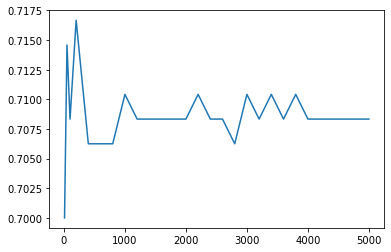

In [6]:
from matplotlib import pyplot as plt
plt.plot(results.keys(),results.values())
plt.show()

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [7]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as XGB
from sklearn.model_selection import cross_val_score
clfs = {
    'Gradient Boosting Classifier': GBC(random_state=RS),
    'XGB Classifier': XGB(random_state=RS)
}
results = {}
for clf_name, clf in clfs.items():
    clf.fit(x_train, y_train)
    results[clf_name] = np.mean(cross_val_score(clf, x_test, y_test, scoring="accuracy",cv=3))
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:52:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,accuracy
Gradient Boosting Classifier,0.629167
XGB Classifier,0.635417


5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy и скорость работы. Выведите лучшие параметры алгоритмов.

In [8]:
from sklearn.model_selection import GridSearchCV
from datetime import datetime
params_gbc = {
    'learning_rate': [0.2, 0.25, 0.3],
    'n_estimators': [5, 6, 7],
    'max_depth': [6, 7, 8]
}
params_xgb = {
    'learning_rate': [0.24, 0.25, 0.3, 0.35, 0.4],
    'n_estimators': [24, 26, 29, 32],
    'max_depth': [8, 9, 11]
}
clfs = [
    ('Gradient Boosting Classifier', GBC(criterion='squared_error', random_state=RS), params_gbc),
    ('XGB Classifier', XGB(colsample_bytree=0.3456, eval_metric='mlogloss', min_child_weight=1, random_state=RS, subsample=0.861, tree_method='hist'), params_xgb)
]
for clf_name, clf, params in clfs:
    start_time = datetime.now()
    grid = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=3)
    fit_model = grid.fit(x_train, y_train)
    print(clf_name, "GridSearchCV best params:", grid.best_params_)
    print("Accuracy:", fit_model.score(x_test, y_test))
    print('Searching time: {}'.format(datetime.now() - start_time))

Gradient Boosting Classifier GridSearchCV best params: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 7}
Accuracy: 0.6479166666666667
Searching time: 0:00:06.766791


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB Classifier GridSearchCV best params: {'learning_rate': 0.3, 'max_depth': 11, 'n_estimators': 32}
Accuracy: 0.66875
Searching time: 0:00:19.194061


1. Gradient Boosting Classifier GridSearchCV best params: 
- 'criterion': 'squared_error'
- 'learning_rate': 0.3
- 'max_depth': 6
- 'n_estimators': 7  
Accuracy: 0.6479166666666667  
Searching time: 0:00:06.766791

2. XGB Classifier GridSearchCV best params:
- 'learning_rate': 0.3
- 'max_depth': 11
- 'n_estimators': 32  
Accuracy: 0.66875  
Searching time: 0:00:19.194061

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [9]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
clfs = {
    'Light GBM Classifier': LGBMClassifier(random_state=RS),
    'CatBoost Classifier': CatBoostClassifier(random_state=RS)
}
results = {}
for clf_name, clf in clfs.items():
    clf.fit(x_train, y_train)
    results[clf_name] = np.mean(cross_val_score(clf, x_test, y_test, scoring="accuracy",cv=3))
pd.DataFrame.from_dict(results, orient='index', columns=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Learning rate set to 0.079582
0:	learn: 1.6983112	total: 149ms	remaining: 2m 28s
1:	learn: 1.6195909	total: 163ms	remaining: 1m 21s
2:	learn: 1.5473745	total: 173ms	remaining: 57.6s
3:	learn: 1.4868983	total: 180ms	remaining: 44.9s
4:	learn: 1.4335671	total: 187ms	remaining: 37.2s
5:	learn: 1.3830208	total: 195ms	remaining: 32.3s
6:	learn: 1.3401860	total: 202ms	remaining: 28.6s
7:	learn: 1.3004799	total: 208ms	remaining: 25.8s
8:	learn: 1.2691308	total: 215ms	remaining: 23.6s
9:	learn: 1.2379323	total: 221ms	remaining: 21.8s
10:	learn: 1.2087042	total: 227ms	remaining: 20.4s
11:	learn: 1.1848751	total: 233ms	remaining: 19.2s
12:	learn: 1.1611554	total: 240ms	remaining: 18.2s
13:	learn: 1.1393231	total: 246ms	remaining: 17.4s
14:	learn: 1.1221297	total: 252ms	remaining: 16.5s
15:	learn: 1.1035864	total: 258ms	remaining: 15.9s
16:	learn: 1.0860113	total: 265ms	remaining: 15.3s
17:	learn: 1.0712759	total: 271ms	remaining: 14.8s
18:	learn: 1.0578447	total: 277ms	remaining: 14.3s
19:	learn

179:	learn: 0.5690987	total: 1.28s	remaining: 5.83s
180:	learn: 0.5669723	total: 1.29s	remaining: 5.82s
181:	learn: 0.5648083	total: 1.29s	remaining: 5.81s
182:	learn: 0.5628159	total: 1.3s	remaining: 5.8s
183:	learn: 0.5611852	total: 1.31s	remaining: 5.79s
184:	learn: 0.5602604	total: 1.31s	remaining: 5.78s
185:	learn: 0.5583253	total: 1.32s	remaining: 5.77s
186:	learn: 0.5564247	total: 1.33s	remaining: 5.77s
187:	learn: 0.5555797	total: 1.33s	remaining: 5.76s
188:	learn: 0.5549834	total: 1.34s	remaining: 5.75s
189:	learn: 0.5534163	total: 1.35s	remaining: 5.74s
190:	learn: 0.5518100	total: 1.35s	remaining: 5.73s
191:	learn: 0.5493082	total: 1.36s	remaining: 5.72s
192:	learn: 0.5478051	total: 1.37s	remaining: 5.71s
193:	learn: 0.5466108	total: 1.37s	remaining: 5.7s
194:	learn: 0.5449582	total: 1.38s	remaining: 5.69s
195:	learn: 0.5434182	total: 1.39s	remaining: 5.68s
196:	learn: 0.5412083	total: 1.39s	remaining: 5.67s
197:	learn: 0.5396860	total: 1.4s	remaining: 5.66s
198:	learn: 0.53

351:	learn: 0.3561281	total: 2.37s	remaining: 4.36s
352:	learn: 0.3551507	total: 2.38s	remaining: 4.35s
353:	learn: 0.3536951	total: 2.38s	remaining: 4.35s
354:	learn: 0.3529490	total: 2.39s	remaining: 4.34s
355:	learn: 0.3523081	total: 2.39s	remaining: 4.33s
356:	learn: 0.3515811	total: 2.4s	remaining: 4.32s
357:	learn: 0.3501435	total: 2.41s	remaining: 4.32s
358:	learn: 0.3493193	total: 2.41s	remaining: 4.31s
359:	learn: 0.3482621	total: 2.42s	remaining: 4.3s
360:	learn: 0.3476662	total: 2.42s	remaining: 4.29s
361:	learn: 0.3464227	total: 2.43s	remaining: 4.28s
362:	learn: 0.3454832	total: 2.44s	remaining: 4.28s
363:	learn: 0.3447979	total: 2.44s	remaining: 4.27s
364:	learn: 0.3437317	total: 2.45s	remaining: 4.26s
365:	learn: 0.3433362	total: 2.46s	remaining: 4.25s
366:	learn: 0.3423882	total: 2.46s	remaining: 4.25s
367:	learn: 0.3417321	total: 2.47s	remaining: 4.24s
368:	learn: 0.3410873	total: 2.47s	remaining: 4.23s
369:	learn: 0.3401247	total: 2.48s	remaining: 4.22s
370:	learn: 0.

527:	learn: 0.2375007	total: 3.47s	remaining: 3.1s
528:	learn: 0.2370835	total: 3.48s	remaining: 3.1s
529:	learn: 0.2367146	total: 3.49s	remaining: 3.09s
530:	learn: 0.2359848	total: 3.49s	remaining: 3.08s
531:	learn: 0.2355290	total: 3.5s	remaining: 3.08s
532:	learn: 0.2348613	total: 3.5s	remaining: 3.07s
533:	learn: 0.2342708	total: 3.51s	remaining: 3.06s
534:	learn: 0.2338249	total: 3.52s	remaining: 3.06s
535:	learn: 0.2332045	total: 3.52s	remaining: 3.05s
536:	learn: 0.2328196	total: 3.53s	remaining: 3.04s
537:	learn: 0.2325230	total: 3.54s	remaining: 3.04s
538:	learn: 0.2322100	total: 3.54s	remaining: 3.03s
539:	learn: 0.2315490	total: 3.55s	remaining: 3.02s
540:	learn: 0.2308060	total: 3.55s	remaining: 3.01s
541:	learn: 0.2302401	total: 3.56s	remaining: 3.01s
542:	learn: 0.2296392	total: 3.56s	remaining: 3s
543:	learn: 0.2289119	total: 3.57s	remaining: 2.99s
544:	learn: 0.2283262	total: 3.58s	remaining: 2.98s
545:	learn: 0.2278819	total: 3.58s	remaining: 2.98s
546:	learn: 0.22750

701:	learn: 0.1694307	total: 4.56s	remaining: 1.94s
702:	learn: 0.1691357	total: 4.57s	remaining: 1.93s
703:	learn: 0.1688963	total: 4.57s	remaining: 1.92s
704:	learn: 0.1685104	total: 4.58s	remaining: 1.92s
705:	learn: 0.1681319	total: 4.59s	remaining: 1.91s
706:	learn: 0.1678320	total: 4.59s	remaining: 1.9s
707:	learn: 0.1675017	total: 4.6s	remaining: 1.9s
708:	learn: 0.1673485	total: 4.61s	remaining: 1.89s
709:	learn: 0.1672473	total: 4.61s	remaining: 1.88s
710:	learn: 0.1669982	total: 4.62s	remaining: 1.88s
711:	learn: 0.1666020	total: 4.63s	remaining: 1.87s
712:	learn: 0.1664419	total: 4.63s	remaining: 1.86s
713:	learn: 0.1662774	total: 4.64s	remaining: 1.86s
714:	learn: 0.1658809	total: 4.64s	remaining: 1.85s
715:	learn: 0.1656393	total: 4.65s	remaining: 1.84s
716:	learn: 0.1651858	total: 4.65s	remaining: 1.84s
717:	learn: 0.1648532	total: 4.66s	remaining: 1.83s
718:	learn: 0.1646916	total: 4.67s	remaining: 1.82s
719:	learn: 0.1644957	total: 4.67s	remaining: 1.82s
720:	learn: 0.1

874:	learn: 0.1284350	total: 5.65s	remaining: 807ms
875:	learn: 0.1282539	total: 5.66s	remaining: 801ms
876:	learn: 0.1280135	total: 5.66s	remaining: 794ms
877:	learn: 0.1277371	total: 5.67s	remaining: 788ms
878:	learn: 0.1275329	total: 5.67s	remaining: 781ms
879:	learn: 0.1272175	total: 5.68s	remaining: 775ms
880:	learn: 0.1271225	total: 5.69s	remaining: 768ms
881:	learn: 0.1268292	total: 5.69s	remaining: 762ms
882:	learn: 0.1266270	total: 5.7s	remaining: 755ms
883:	learn: 0.1264034	total: 5.71s	remaining: 749ms
884:	learn: 0.1263178	total: 5.71s	remaining: 742ms
885:	learn: 0.1261736	total: 5.72s	remaining: 736ms
886:	learn: 0.1260523	total: 5.72s	remaining: 729ms
887:	learn: 0.1259434	total: 5.73s	remaining: 723ms
888:	learn: 0.1258626	total: 5.74s	remaining: 716ms
889:	learn: 0.1256885	total: 5.74s	remaining: 710ms
890:	learn: 0.1256045	total: 5.75s	remaining: 703ms
891:	learn: 0.1254207	total: 5.75s	remaining: 697ms
892:	learn: 0.1252178	total: 5.76s	remaining: 690ms
893:	learn: 0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Learning rate set to 0.07466
0:	learn: 1.7123331	total: 8.6ms	remaining: 8.6s
1:	learn: 1.6372596	total: 16.9ms	remaining: 8.44s
2:	learn: 1.5808791	total: 24.9ms	remaining: 8.26s
3:	learn: 1.5298527	total: 29.8ms	remaining: 7.43s
4:	learn: 1.4740694	total: 34.4ms	remaining: 6.83s
5:	learn: 1.4276871	total: 38.7ms	remaining: 6.41s
6:	learn: 1.3797011	total: 43.3ms	remaining: 6.14s
7:	learn: 1.3427028	total: 47.8ms	remaining: 5.93s
8:	learn: 1.2988401	total: 52.9ms	remaining: 5.82s
9:	learn: 1.2588470	total: 56.9ms	remaining: 5.63s
10:	learn: 1.2227144	total: 61ms	remaining: 5.48s
11:	learn: 1.1910470	total: 64.8ms	remaining: 5.33s
12:	learn: 1.1609078	total: 69ms	remaining: 5.24s
13:	learn: 1.1304258	total: 72.9ms	remaining: 5.13s
14:	learn: 1.1063586	total: 76.9ms	remaining: 5.05s
15:	learn: 1.0809232	total: 80.8ms	remaining: 4.97s
16:	learn: 1.0595897	total: 84.9ms	remaining: 4.91s
17:	learn: 1.0385001	total: 88.6ms	remaining: 4.83s
18:	learn: 1.0211733	total: 92.6ms	remaining: 4.78s

168:	learn: 0.3483055	total: 711ms	remaining: 3.49s
169:	learn: 0.3467015	total: 715ms	remaining: 3.49s
170:	learn: 0.3449898	total: 719ms	remaining: 3.48s
171:	learn: 0.3433584	total: 724ms	remaining: 3.48s
172:	learn: 0.3414828	total: 728ms	remaining: 3.48s
173:	learn: 0.3391774	total: 732ms	remaining: 3.48s
174:	learn: 0.3381476	total: 737ms	remaining: 3.47s
175:	learn: 0.3363616	total: 742ms	remaining: 3.47s
176:	learn: 0.3349434	total: 746ms	remaining: 3.47s
177:	learn: 0.3338914	total: 749ms	remaining: 3.46s
178:	learn: 0.3322254	total: 753ms	remaining: 3.46s
179:	learn: 0.3307424	total: 758ms	remaining: 3.45s
180:	learn: 0.3303050	total: 759ms	remaining: 3.44s
181:	learn: 0.3285736	total: 763ms	remaining: 3.43s
182:	learn: 0.3273867	total: 767ms	remaining: 3.42s
183:	learn: 0.3256088	total: 771ms	remaining: 3.42s
184:	learn: 0.3237877	total: 775ms	remaining: 3.42s
185:	learn: 0.3227349	total: 779ms	remaining: 3.41s
186:	learn: 0.3216861	total: 783ms	remaining: 3.4s
187:	learn: 0

341:	learn: 0.1749933	total: 1.43s	remaining: 2.74s
342:	learn: 0.1739633	total: 1.43s	remaining: 2.74s
343:	learn: 0.1735636	total: 1.44s	remaining: 2.74s
344:	learn: 0.1730981	total: 1.44s	remaining: 2.73s
345:	learn: 0.1725058	total: 1.44s	remaining: 2.73s
346:	learn: 0.1717682	total: 1.45s	remaining: 2.72s
347:	learn: 0.1714327	total: 1.45s	remaining: 2.72s
348:	learn: 0.1710562	total: 1.46s	remaining: 2.71s
349:	learn: 0.1700583	total: 1.46s	remaining: 2.71s
350:	learn: 0.1696791	total: 1.46s	remaining: 2.71s
351:	learn: 0.1690977	total: 1.47s	remaining: 2.7s
352:	learn: 0.1681388	total: 1.47s	remaining: 2.7s
353:	learn: 0.1675541	total: 1.48s	remaining: 2.69s
354:	learn: 0.1670937	total: 1.48s	remaining: 2.69s
355:	learn: 0.1667318	total: 1.48s	remaining: 2.68s
356:	learn: 0.1658404	total: 1.49s	remaining: 2.68s
357:	learn: 0.1651480	total: 1.49s	remaining: 2.68s
358:	learn: 0.1648272	total: 1.5s	remaining: 2.67s
359:	learn: 0.1643710	total: 1.5s	remaining: 2.67s
360:	learn: 0.16

520:	learn: 0.1045566	total: 2.14s	remaining: 1.97s
521:	learn: 0.1044369	total: 2.15s	remaining: 1.97s
522:	learn: 0.1043257	total: 2.15s	remaining: 1.96s
523:	learn: 0.1037895	total: 2.16s	remaining: 1.96s
524:	learn: 0.1034588	total: 2.16s	remaining: 1.96s
525:	learn: 0.1031758	total: 2.16s	remaining: 1.95s
526:	learn: 0.1028260	total: 2.17s	remaining: 1.95s
527:	learn: 0.1025278	total: 2.17s	remaining: 1.94s
528:	learn: 0.1022979	total: 2.18s	remaining: 1.94s
529:	learn: 0.1020082	total: 2.18s	remaining: 1.93s
530:	learn: 0.1016596	total: 2.18s	remaining: 1.93s
531:	learn: 0.1013002	total: 2.19s	remaining: 1.93s
532:	learn: 0.1009733	total: 2.19s	remaining: 1.92s
533:	learn: 0.1007450	total: 2.2s	remaining: 1.92s
534:	learn: 0.1004225	total: 2.2s	remaining: 1.91s
535:	learn: 0.1001383	total: 2.2s	remaining: 1.91s
536:	learn: 0.0999740	total: 2.21s	remaining: 1.9s
537:	learn: 0.0997228	total: 2.21s	remaining: 1.9s
538:	learn: 0.0995819	total: 2.22s	remaining: 1.9s
539:	learn: 0.0993

698:	learn: 0.0708838	total: 2.86s	remaining: 1.23s
699:	learn: 0.0707433	total: 2.87s	remaining: 1.23s
700:	learn: 0.0706651	total: 2.87s	remaining: 1.22s
701:	learn: 0.0705893	total: 2.88s	remaining: 1.22s
702:	learn: 0.0704401	total: 2.88s	remaining: 1.22s
703:	learn: 0.0703191	total: 2.88s	remaining: 1.21s
704:	learn: 0.0702242	total: 2.89s	remaining: 1.21s
705:	learn: 0.0700964	total: 2.89s	remaining: 1.2s
706:	learn: 0.0699492	total: 2.9s	remaining: 1.2s
707:	learn: 0.0698337	total: 2.9s	remaining: 1.2s
708:	learn: 0.0697584	total: 2.9s	remaining: 1.19s
709:	learn: 0.0696976	total: 2.91s	remaining: 1.19s
710:	learn: 0.0696252	total: 2.91s	remaining: 1.18s
711:	learn: 0.0694938	total: 2.92s	remaining: 1.18s
712:	learn: 0.0694388	total: 2.92s	remaining: 1.18s
713:	learn: 0.0693073	total: 2.92s	remaining: 1.17s
714:	learn: 0.0692131	total: 2.93s	remaining: 1.17s
715:	learn: 0.0690810	total: 2.93s	remaining: 1.16s
716:	learn: 0.0689244	total: 2.94s	remaining: 1.16s
717:	learn: 0.0688

879:	learn: 0.0523745	total: 3.58s	remaining: 488ms
880:	learn: 0.0523261	total: 3.58s	remaining: 484ms
881:	learn: 0.0522150	total: 3.59s	remaining: 480ms
882:	learn: 0.0521680	total: 3.59s	remaining: 476ms
883:	learn: 0.0521195	total: 3.6s	remaining: 472ms
884:	learn: 0.0520785	total: 3.6s	remaining: 468ms
885:	learn: 0.0519848	total: 3.6s	remaining: 464ms
886:	learn: 0.0519196	total: 3.61s	remaining: 460ms
887:	learn: 0.0518391	total: 3.61s	remaining: 456ms
888:	learn: 0.0517626	total: 3.62s	remaining: 452ms
889:	learn: 0.0517076	total: 3.62s	remaining: 448ms
890:	learn: 0.0516452	total: 3.63s	remaining: 443ms
891:	learn: 0.0515791	total: 3.63s	remaining: 439ms
892:	learn: 0.0514675	total: 3.63s	remaining: 435ms
893:	learn: 0.0514300	total: 3.64s	remaining: 431ms
894:	learn: 0.0513250	total: 3.64s	remaining: 427ms
895:	learn: 0.0512629	total: 3.64s	remaining: 423ms
896:	learn: 0.0512078	total: 3.65s	remaining: 419ms
897:	learn: 0.0510973	total: 3.65s	remaining: 415ms
898:	learn: 0.0

42:	learn: 0.7742004	total: 181ms	remaining: 4.03s
43:	learn: 0.7676551	total: 186ms	remaining: 4.03s
44:	learn: 0.7600075	total: 190ms	remaining: 4.03s
45:	learn: 0.7522201	total: 195ms	remaining: 4.04s
46:	learn: 0.7466455	total: 199ms	remaining: 4.04s
47:	learn: 0.7395491	total: 203ms	remaining: 4.03s
48:	learn: 0.7341805	total: 207ms	remaining: 4.02s
49:	learn: 0.7279286	total: 211ms	remaining: 4.01s
50:	learn: 0.7227583	total: 215ms	remaining: 4s
51:	learn: 0.7184154	total: 219ms	remaining: 3.99s
52:	learn: 0.7131672	total: 223ms	remaining: 3.99s
53:	learn: 0.7089426	total: 227ms	remaining: 3.98s
54:	learn: 0.7051033	total: 231ms	remaining: 3.96s
55:	learn: 0.6998131	total: 235ms	remaining: 3.96s
56:	learn: 0.6948767	total: 239ms	remaining: 3.95s
57:	learn: 0.6900778	total: 243ms	remaining: 3.94s
58:	learn: 0.6832492	total: 246ms	remaining: 3.93s
59:	learn: 0.6787035	total: 250ms	remaining: 3.92s
60:	learn: 0.6744332	total: 254ms	remaining: 3.91s
61:	learn: 0.6699207	total: 258ms	

217:	learn: 0.2927658	total: 896ms	remaining: 3.21s
218:	learn: 0.2916151	total: 901ms	remaining: 3.21s
219:	learn: 0.2908246	total: 905ms	remaining: 3.21s
220:	learn: 0.2896524	total: 909ms	remaining: 3.2s
221:	learn: 0.2884974	total: 913ms	remaining: 3.2s
222:	learn: 0.2874501	total: 917ms	remaining: 3.2s
223:	learn: 0.2860029	total: 922ms	remaining: 3.19s
224:	learn: 0.2840801	total: 926ms	remaining: 3.19s
225:	learn: 0.2832710	total: 930ms	remaining: 3.19s
226:	learn: 0.2825366	total: 935ms	remaining: 3.18s
227:	learn: 0.2812296	total: 939ms	remaining: 3.18s
228:	learn: 0.2798441	total: 943ms	remaining: 3.18s
229:	learn: 0.2781451	total: 948ms	remaining: 3.17s
230:	learn: 0.2765748	total: 952ms	remaining: 3.17s
231:	learn: 0.2751500	total: 956ms	remaining: 3.16s
232:	learn: 0.2741109	total: 963ms	remaining: 3.17s
233:	learn: 0.2723404	total: 967ms	remaining: 3.17s
234:	learn: 0.2714270	total: 971ms	remaining: 3.16s
235:	learn: 0.2710349	total: 974ms	remaining: 3.15s
236:	learn: 0.2

394:	learn: 0.1483525	total: 1.62s	remaining: 2.48s
395:	learn: 0.1478893	total: 1.62s	remaining: 2.48s
396:	learn: 0.1476337	total: 1.63s	remaining: 2.47s
397:	learn: 0.1471638	total: 1.63s	remaining: 2.47s
398:	learn: 0.1468792	total: 1.64s	remaining: 2.46s
399:	learn: 0.1462588	total: 1.64s	remaining: 2.46s
400:	learn: 0.1459171	total: 1.64s	remaining: 2.46s
401:	learn: 0.1454523	total: 1.65s	remaining: 2.45s
402:	learn: 0.1448681	total: 1.65s	remaining: 2.45s
403:	learn: 0.1444229	total: 1.66s	remaining: 2.44s
404:	learn: 0.1439930	total: 1.66s	remaining: 2.44s
405:	learn: 0.1436039	total: 1.66s	remaining: 2.44s
406:	learn: 0.1433422	total: 1.67s	remaining: 2.43s
407:	learn: 0.1429501	total: 1.67s	remaining: 2.43s
408:	learn: 0.1424589	total: 1.68s	remaining: 2.42s
409:	learn: 0.1419533	total: 1.68s	remaining: 2.42s
410:	learn: 0.1416095	total: 1.68s	remaining: 2.41s
411:	learn: 0.1411338	total: 1.69s	remaining: 2.41s
412:	learn: 0.1406478	total: 1.69s	remaining: 2.41s
413:	learn: 

566:	learn: 0.0939428	total: 2.33s	remaining: 1.78s
567:	learn: 0.0937495	total: 2.34s	remaining: 1.78s
568:	learn: 0.0936173	total: 2.34s	remaining: 1.77s
569:	learn: 0.0933949	total: 2.35s	remaining: 1.77s
570:	learn: 0.0931979	total: 2.35s	remaining: 1.77s
571:	learn: 0.0929806	total: 2.36s	remaining: 1.76s
572:	learn: 0.0927711	total: 2.36s	remaining: 1.76s
573:	learn: 0.0925313	total: 2.37s	remaining: 1.75s
574:	learn: 0.0922145	total: 2.37s	remaining: 1.75s
575:	learn: 0.0919601	total: 2.37s	remaining: 1.75s
576:	learn: 0.0917633	total: 2.38s	remaining: 1.74s
577:	learn: 0.0915843	total: 2.38s	remaining: 1.74s
578:	learn: 0.0913824	total: 2.38s	remaining: 1.73s
579:	learn: 0.0912314	total: 2.39s	remaining: 1.73s
580:	learn: 0.0909521	total: 2.39s	remaining: 1.73s
581:	learn: 0.0907142	total: 2.4s	remaining: 1.72s
582:	learn: 0.0904915	total: 2.4s	remaining: 1.72s
583:	learn: 0.0903186	total: 2.4s	remaining: 1.71s
584:	learn: 0.0901103	total: 2.41s	remaining: 1.71s
585:	learn: 0.0

744:	learn: 0.0641854	total: 3.06s	remaining: 1.05s
745:	learn: 0.0640902	total: 3.06s	remaining: 1.04s
746:	learn: 0.0639475	total: 3.07s	remaining: 1.04s
747:	learn: 0.0637952	total: 3.07s	remaining: 1.03s
748:	learn: 0.0636763	total: 3.08s	remaining: 1.03s
749:	learn: 0.0635739	total: 3.08s	remaining: 1.03s
750:	learn: 0.0634977	total: 3.08s	remaining: 1.02s
751:	learn: 0.0634172	total: 3.09s	remaining: 1.02s
752:	learn: 0.0633020	total: 3.09s	remaining: 1.01s
753:	learn: 0.0631958	total: 3.1s	remaining: 1.01s
754:	learn: 0.0630704	total: 3.1s	remaining: 1s
755:	learn: 0.0629274	total: 3.1s	remaining: 1s
756:	learn: 0.0628347	total: 3.11s	remaining: 997ms
757:	learn: 0.0626466	total: 3.11s	remaining: 993ms
758:	learn: 0.0625462	total: 3.11s	remaining: 989ms
759:	learn: 0.0624186	total: 3.12s	remaining: 985ms
760:	learn: 0.0623332	total: 3.12s	remaining: 981ms
761:	learn: 0.0622164	total: 3.13s	remaining: 976ms
762:	learn: 0.0620572	total: 3.13s	remaining: 972ms
763:	learn: 0.0619125

920:	learn: 0.0481127	total: 3.78s	remaining: 324ms
921:	learn: 0.0480227	total: 3.78s	remaining: 320ms
922:	learn: 0.0479474	total: 3.79s	remaining: 316ms
923:	learn: 0.0478867	total: 3.79s	remaining: 312ms
924:	learn: 0.0477644	total: 3.79s	remaining: 308ms
925:	learn: 0.0476910	total: 3.8s	remaining: 304ms
926:	learn: 0.0476043	total: 3.8s	remaining: 299ms
927:	learn: 0.0475423	total: 3.81s	remaining: 295ms
928:	learn: 0.0474488	total: 3.81s	remaining: 291ms
929:	learn: 0.0473918	total: 3.81s	remaining: 287ms
930:	learn: 0.0473287	total: 3.82s	remaining: 283ms
931:	learn: 0.0472589	total: 3.82s	remaining: 279ms
932:	learn: 0.0471859	total: 3.83s	remaining: 275ms
933:	learn: 0.0471147	total: 3.83s	remaining: 271ms
934:	learn: 0.0470474	total: 3.83s	remaining: 267ms
935:	learn: 0.0469834	total: 3.84s	remaining: 262ms
936:	learn: 0.0468579	total: 3.84s	remaining: 258ms
937:	learn: 0.0467830	total: 3.85s	remaining: 254ms
938:	learn: 0.0467049	total: 3.85s	remaining: 250ms
939:	learn: 0.

83:	learn: 0.5770508	total: 360ms	remaining: 3.92s
84:	learn: 0.5728642	total: 364ms	remaining: 3.92s
85:	learn: 0.5697453	total: 368ms	remaining: 3.92s
86:	learn: 0.5669272	total: 373ms	remaining: 3.91s
87:	learn: 0.5644196	total: 377ms	remaining: 3.91s
88:	learn: 0.5615264	total: 382ms	remaining: 3.91s
89:	learn: 0.5580635	total: 387ms	remaining: 3.91s
90:	learn: 0.5530357	total: 391ms	remaining: 3.9s
91:	learn: 0.5496474	total: 395ms	remaining: 3.9s
92:	learn: 0.5473508	total: 400ms	remaining: 3.9s
93:	learn: 0.5443148	total: 404ms	remaining: 3.89s
94:	learn: 0.5411995	total: 407ms	remaining: 3.88s
95:	learn: 0.5366691	total: 411ms	remaining: 3.87s
96:	learn: 0.5335876	total: 415ms	remaining: 3.87s
97:	learn: 0.5288981	total: 419ms	remaining: 3.86s
98:	learn: 0.5248911	total: 423ms	remaining: 3.85s
99:	learn: 0.5201539	total: 427ms	remaining: 3.84s
100:	learn: 0.5167742	total: 431ms	remaining: 3.84s
101:	learn: 0.5147371	total: 435ms	remaining: 3.83s
102:	learn: 0.5123404	total: 439

263:	learn: 0.2323112	total: 1.08s	remaining: 3.01s
264:	learn: 0.2308921	total: 1.08s	remaining: 3s
265:	learn: 0.2299452	total: 1.09s	remaining: 3s
266:	learn: 0.2289908	total: 1.09s	remaining: 3s
267:	learn: 0.2281336	total: 1.1s	remaining: 2.99s
268:	learn: 0.2271968	total: 1.1s	remaining: 2.99s
269:	learn: 0.2264037	total: 1.1s	remaining: 2.99s
270:	learn: 0.2251769	total: 1.11s	remaining: 2.98s
271:	learn: 0.2242219	total: 1.11s	remaining: 2.97s
272:	learn: 0.2235241	total: 1.11s	remaining: 2.97s
273:	learn: 0.2227045	total: 1.12s	remaining: 2.97s
274:	learn: 0.2213314	total: 1.12s	remaining: 2.96s
275:	learn: 0.2203617	total: 1.13s	remaining: 2.96s
276:	learn: 0.2195030	total: 1.13s	remaining: 2.95s
277:	learn: 0.2187998	total: 1.14s	remaining: 2.95s
278:	learn: 0.2177041	total: 1.14s	remaining: 2.94s
279:	learn: 0.2167246	total: 1.14s	remaining: 2.94s
280:	learn: 0.2158310	total: 1.15s	remaining: 2.94s
281:	learn: 0.2148038	total: 1.15s	remaining: 2.93s
282:	learn: 0.2136806	to

439:	learn: 0.1223423	total: 1.79s	remaining: 2.29s
440:	learn: 0.1219851	total: 1.8s	remaining: 2.28s
441:	learn: 0.1217439	total: 1.8s	remaining: 2.28s
442:	learn: 0.1214763	total: 1.81s	remaining: 2.27s
443:	learn: 0.1210213	total: 1.81s	remaining: 2.27s
444:	learn: 0.1206863	total: 1.82s	remaining: 2.27s
445:	learn: 0.1204359	total: 1.82s	remaining: 2.26s
446:	learn: 0.1201087	total: 1.83s	remaining: 2.26s
447:	learn: 0.1197641	total: 1.83s	remaining: 2.25s
448:	learn: 0.1194941	total: 1.83s	remaining: 2.25s
449:	learn: 0.1193277	total: 1.84s	remaining: 2.25s
450:	learn: 0.1190715	total: 1.84s	remaining: 2.24s
451:	learn: 0.1188963	total: 1.85s	remaining: 2.24s
452:	learn: 0.1186442	total: 1.85s	remaining: 2.23s
453:	learn: 0.1184244	total: 1.85s	remaining: 2.23s
454:	learn: 0.1180946	total: 1.86s	remaining: 2.23s
455:	learn: 0.1176708	total: 1.86s	remaining: 2.22s
456:	learn: 0.1173319	total: 1.87s	remaining: 2.22s
457:	learn: 0.1170849	total: 1.87s	remaining: 2.22s
458:	learn: 0.

607:	learn: 0.0805312	total: 2.51s	remaining: 1.62s
608:	learn: 0.0803274	total: 2.52s	remaining: 1.62s
609:	learn: 0.0801893	total: 2.52s	remaining: 1.61s
610:	learn: 0.0800451	total: 2.53s	remaining: 1.61s
611:	learn: 0.0798807	total: 2.53s	remaining: 1.6s
612:	learn: 0.0796442	total: 2.54s	remaining: 1.6s
613:	learn: 0.0794613	total: 2.54s	remaining: 1.6s
614:	learn: 0.0792780	total: 2.55s	remaining: 1.59s
615:	learn: 0.0791070	total: 2.55s	remaining: 1.59s
616:	learn: 0.0789031	total: 2.56s	remaining: 1.59s
617:	learn: 0.0786641	total: 2.56s	remaining: 1.58s
618:	learn: 0.0784767	total: 2.56s	remaining: 1.58s
619:	learn: 0.0783642	total: 2.57s	remaining: 1.57s
620:	learn: 0.0782492	total: 2.57s	remaining: 1.57s
621:	learn: 0.0780799	total: 2.58s	remaining: 1.56s
622:	learn: 0.0779321	total: 2.58s	remaining: 1.56s
623:	learn: 0.0777123	total: 2.58s	remaining: 1.56s
624:	learn: 0.0775731	total: 2.59s	remaining: 1.55s
625:	learn: 0.0773869	total: 2.59s	remaining: 1.55s
626:	learn: 0.0

787:	learn: 0.0566268	total: 3.23s	remaining: 869ms
788:	learn: 0.0565061	total: 3.23s	remaining: 865ms
789:	learn: 0.0563983	total: 3.24s	remaining: 861ms
790:	learn: 0.0563261	total: 3.24s	remaining: 857ms
791:	learn: 0.0562582	total: 3.25s	remaining: 853ms
792:	learn: 0.0561575	total: 3.25s	remaining: 849ms
793:	learn: 0.0560412	total: 3.25s	remaining: 845ms
794:	learn: 0.0559613	total: 3.26s	remaining: 841ms
795:	learn: 0.0558093	total: 3.26s	remaining: 836ms
796:	learn: 0.0557166	total: 3.27s	remaining: 832ms
797:	learn: 0.0556421	total: 3.27s	remaining: 828ms
798:	learn: 0.0555662	total: 3.27s	remaining: 824ms
799:	learn: 0.0554843	total: 3.28s	remaining: 820ms
800:	learn: 0.0554158	total: 3.28s	remaining: 816ms
801:	learn: 0.0553689	total: 3.29s	remaining: 812ms
802:	learn: 0.0553050	total: 3.29s	remaining: 808ms
803:	learn: 0.0552262	total: 3.29s	remaining: 803ms
804:	learn: 0.0550886	total: 3.3s	remaining: 799ms
805:	learn: 0.0550045	total: 3.3s	remaining: 795ms
806:	learn: 0.

969:	learn: 0.0430416	total: 3.95s	remaining: 122ms
970:	learn: 0.0429999	total: 3.96s	remaining: 118ms
971:	learn: 0.0429651	total: 3.96s	remaining: 114ms
972:	learn: 0.0429204	total: 3.96s	remaining: 110ms
973:	learn: 0.0428402	total: 3.97s	remaining: 106ms
974:	learn: 0.0427808	total: 3.97s	remaining: 102ms
975:	learn: 0.0427178	total: 3.98s	remaining: 97.8ms
976:	learn: 0.0426647	total: 3.98s	remaining: 93.7ms
977:	learn: 0.0426022	total: 3.98s	remaining: 89.7ms
978:	learn: 0.0425347	total: 3.99s	remaining: 85.6ms
979:	learn: 0.0424644	total: 3.99s	remaining: 81.5ms
980:	learn: 0.0424159	total: 4s	remaining: 77.4ms
981:	learn: 0.0423478	total: 4s	remaining: 73.3ms
982:	learn: 0.0423152	total: 4s	remaining: 69.3ms
983:	learn: 0.0422685	total: 4.01s	remaining: 65.2ms
984:	learn: 0.0422127	total: 4.01s	remaining: 61.1ms
985:	learn: 0.0421590	total: 4.02s	remaining: 57ms
986:	learn: 0.0421050	total: 4.02s	remaining: 53ms
987:	learn: 0.0420248	total: 4.02s	remaining: 48.9ms
988:	learn: 

,accuracy
Light GBM Classifier,0.625000
CatBoost Classifier,0.627083


Алгоритмы без подбора параметров дают следующие результаты:
- Gradient Boosting Classifier 0.629167
- XGB Classifier 0.635417
- Light GBM Classifier 0.625000
- CatBoost Classifier 0.627083

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями. Выведите лучшие параметры алгоритмов.
Сравните значение метрики accuracy и скорость по этим четырем реализациям.

In [10]:
params_lgbm = {
    'learning_rate': [0.15, 0.2, 0.25],
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'max_depth': [4, 5, 6, 7, 8, 9]
}
params_cat = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [200],
    'max_depth': [8, 9, 10]
}
clfs = [
    ('Light GBM Classifier', LGBMClassifier(random_state=RS), params_lgbm),
    ('CatBoost Classifier', CatBoostClassifier(random_state=RS), params_cat)
]
for clf_name, clf, params in clfs:
    start_time = datetime.now()
    grid = GridSearchCV(clf, params, scoring='accuracy', cv=3, n_jobs=-1)
    fit_model = grid.fit(x_train, y_train)
    print(clf_name, "GridSearchCV best params:",
          grid.best_params_,"\nAccuracy:", fit_model.score(x_test, y_test))
    print('Searching time: {}'.format(datetime.now() - start_time))

Light GBM Classifier GridSearchCV best params: {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 100} 
Accuracy: 0.675
Searching time: 0:02:07.136913
0:	learn: 1.6844007	total: 27.8ms	remaining: 5.54s
1:	learn: 1.5904555	total: 58.4ms	remaining: 5.78s
2:	learn: 1.5091754	total: 87.4ms	remaining: 5.74s
3:	learn: 1.4394190	total: 117ms	remaining: 5.73s
4:	learn: 1.3872343	total: 146ms	remaining: 5.71s
5:	learn: 1.3339525	total: 174ms	remaining: 5.63s
6:	learn: 1.2904065	total: 205ms	remaining: 5.65s
7:	learn: 1.2526978	total: 235ms	remaining: 5.63s
8:	learn: 1.2185388	total: 269ms	remaining: 5.71s
9:	learn: 1.1826612	total: 298ms	remaining: 5.67s
10:	learn: 1.1541963	total: 328ms	remaining: 5.64s
11:	learn: 1.1250619	total: 359ms	remaining: 5.62s
12:	learn: 1.1010181	total: 387ms	remaining: 5.57s
13:	learn: 1.0781908	total: 417ms	remaining: 5.53s
14:	learn: 1.0577714	total: 453ms	remaining: 5.58s
15:	learn: 1.0371649	total: 482ms	remaining: 5.55s
16:	learn: 1.0203759	total: 510ms	r

158:	learn: 0.3753270	total: 4.77s	remaining: 1.23s
159:	learn: 0.3730060	total: 4.8s	remaining: 1.2s
160:	learn: 0.3720355	total: 4.83s	remaining: 1.17s
161:	learn: 0.3702793	total: 4.86s	remaining: 1.14s
162:	learn: 0.3678274	total: 4.89s	remaining: 1.11s
163:	learn: 0.3664217	total: 4.92s	remaining: 1.08s
164:	learn: 0.3639426	total: 4.95s	remaining: 1.05s
165:	learn: 0.3615721	total: 4.98s	remaining: 1.02s
166:	learn: 0.3596223	total: 5.01s	remaining: 990ms
167:	learn: 0.3574836	total: 5.04s	remaining: 961ms
168:	learn: 0.3546860	total: 5.08s	remaining: 931ms
169:	learn: 0.3522630	total: 5.11s	remaining: 902ms
170:	learn: 0.3501468	total: 5.14s	remaining: 872ms
171:	learn: 0.3485712	total: 5.17s	remaining: 842ms
172:	learn: 0.3470735	total: 5.2s	remaining: 812ms
173:	learn: 0.3453159	total: 5.23s	remaining: 782ms
174:	learn: 0.3447883	total: 5.26s	remaining: 752ms
175:	learn: 0.3426062	total: 5.29s	remaining: 722ms
176:	learn: 0.3412863	total: 5.32s	remaining: 691ms
177:	learn: 0.3

3. Light GBM Classifier GridSearchCV best params: 
- 'learning_rate': 0.15
- 'max_depth': 6
- 'n_estimators': 100  
Accuracy: 0.675  
Searching time: 0:02:07.136913

4. CatBoost Classifier GridSearchCV best params: 
- 'learning_rate': 0.1
- 'max_depth': 8
- 'n_estimators': 200  
Accuracy: 0.7  
Searching time: 0:03:03.495808

Алгоритмы с подбором параметров дают следующие результаты:
- Gradient Boosting Classifier 0.6479166666666667, Searching time: 0:00:06.766791
- XGB Classifier 0.66875, Searching time: 0:00:19.194061
- Light GBM Classifier 0.675, Searching time: 0:02:07.136913
- CatBoost Classifier 0.7, Searching time: 0:03:03.495808

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [hyperopt](https://github.com/hyperopt/hyperopt) . Параметры для оптимизации:

оптимизируемый функционал

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [11]:
from hyperopt import hp, fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
xgb_reg_params = {
    'learning_rate':    hp.uniform('learning_rate', 0.05, 1),
    'max_depth':        hp.choice('max_depth',        np.arange(5, 100, 1, dtype=int)),
    'n_estimators':     26,
    'min_child_weight': 1,
    'colsample_bytree': 0.3456,
    'subsample':        0.861,
    'tree_method':      'hist',
    'random_state': RS
}
xgb_fit_params = {
    'eval_metric': 'mlogloss',
    'verbose': False
}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func' ] = lambda y, pred: 1 - accuracy_score(y, pred)

class HPOpt(object):
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test
        self.result = 0

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            self.result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return self.result, trials

    def xgb_reg(self, para):
        reg = XGB(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        eval_set = [(self.x_train, self.y_train), (self.x_test, self.y_test)]
        reg.fit(self.x_train, self.y_train, eval_set=eval_set, **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}
    
    def return_result(self):
        return self.result

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
obj = HPOpt(x_train, x_test, y_train, y_test)
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=1000)
print(obj.return_result())

100%|███████████████████████████████████████████| 1000/1000 [06:17<00:00,  2.65trial/s, best loss: 0.29166666666666663]
{'learning_rate': 0.4320696877730758, 'max_depth': 63}


Неплохая библиотека, позволяющая выполнить случайный поиск для гиперпараметров с ожидаемым временем завершения.  
Значение Accuracy после подбора получилось значительно выше, чем поиск по сетке с помощью GridSearch, благодаря более гибкой настройке параметров подбора.  
Время поиска: 06:17
- 'learning_rate': 0.4320696877730758
- 'max_depth': 68

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [12]:
from sklearn.ensemble import StackingClassifier
estimators = [
    ('GBC', GBC(random_state=RS)),
    ('XGB', XGB(random_state=RS)),
    ('LGBM', LGBMClassifier(random_state=RS)),
    ('CatBoost', CatBoostClassifier(random_state=RS))
]
stacking = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stacking.fit(x_train, y_train)
y_pred = stacking.predict(x_test)
print("Stacking accuracy:", accuracy_score(y_test, y_pred))

Stacking accuracy: 0.7166666666666667


10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [13]:
estimators_tuned = [
    ('GBC', GBC(
        criterion='squared_error',
        learning_rate=0.25,
        max_depth=6,
        n_estimators=7,
        random_state=RS)
    ),
    ('XGB', XGB(
        learning_rate=0.24,
        colsample_bytree=0.3456,
        eval_metric='mlogloss',
        max_depth=7,
        min_child_weight=1,
        n_estimators=32,
        random_state=RS,
        subsample=0.861,
        tree_method='hist')
    ),
    ('LGBM', LGBMClassifier(
        learning_rate=0.15,
        max_depth=8,
        n_estimators=100,
        random_state=RS)
    ),
    ('CatBoost', CatBoostClassifier(
        learning_rate=0.1,
        max_depth=8,
        n_estimators=200,
        random_state=RS)
    )
]
stacking_tuned = StackingClassifier(estimators=estimators, cv=3, n_jobs=-1)
stacking_tuned.fit(x_train, y_train)
y_pred_tuned = stacking_tuned.predict(x_test)
print("Stacking tuned accuracy:", accuracy_score(y_test, y_pred_tuned))

Stacking tuned accuracy: 0.7166666666666667


Результат стэкинга нескольких алгоритмов с настроенными параметрами и без дополнительной настройки дают одинаковую точность, что позволяет пропустить этап настройки и вместо него использовать стэккинг.